In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [22]:
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'
 
# Buat URL unduhan langsung
download_url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(download_url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **EDA**

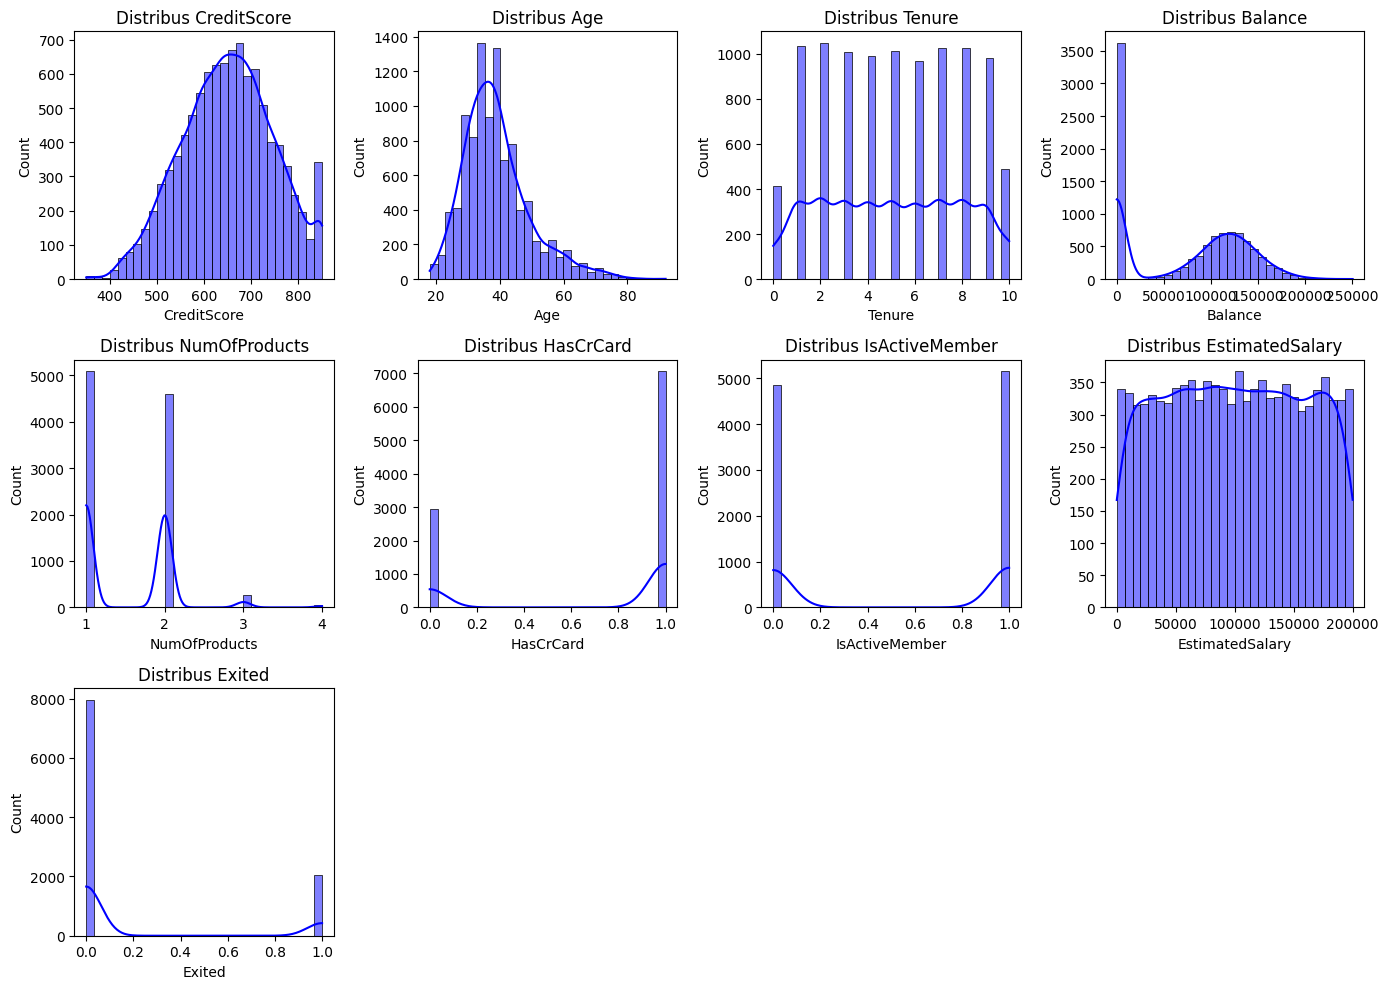

In [34]:
num_features = data.select_dtypes('number')
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribus {col}')
    
plt.tight_layout()
plt.show()

In [39]:
cat_features = data.select_dtypes('object')
cat_features

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


/tmp/ipykernel_14561/2352033461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(cat_features[col], palette='viridis')
/tmp/ipykernel_14561/2352033461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(cat_features[col], palette='viridis')


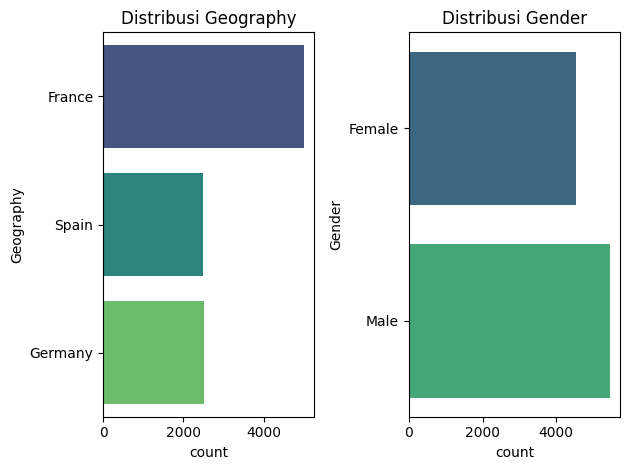

In [47]:
for i, col in enumerate(cat_features):
    plt.subplot(1, 2, i + 1)
    sns.countplot(cat_features[col], palette='viridis')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

<Axes: >

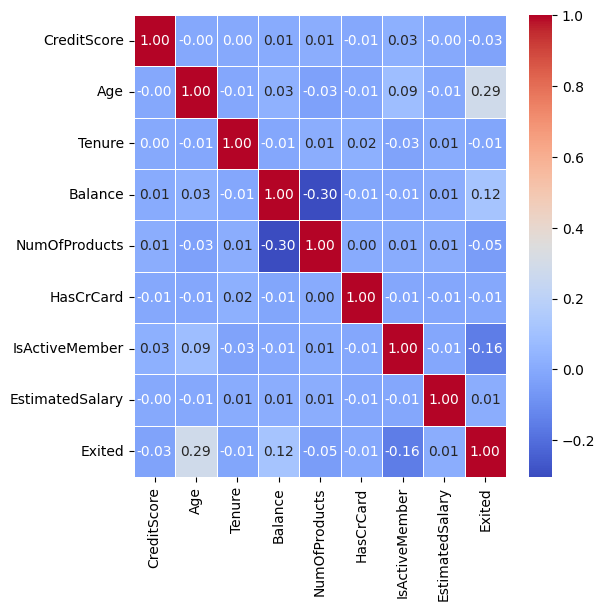

In [51]:
plt.figure(figsize=(6, 6))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

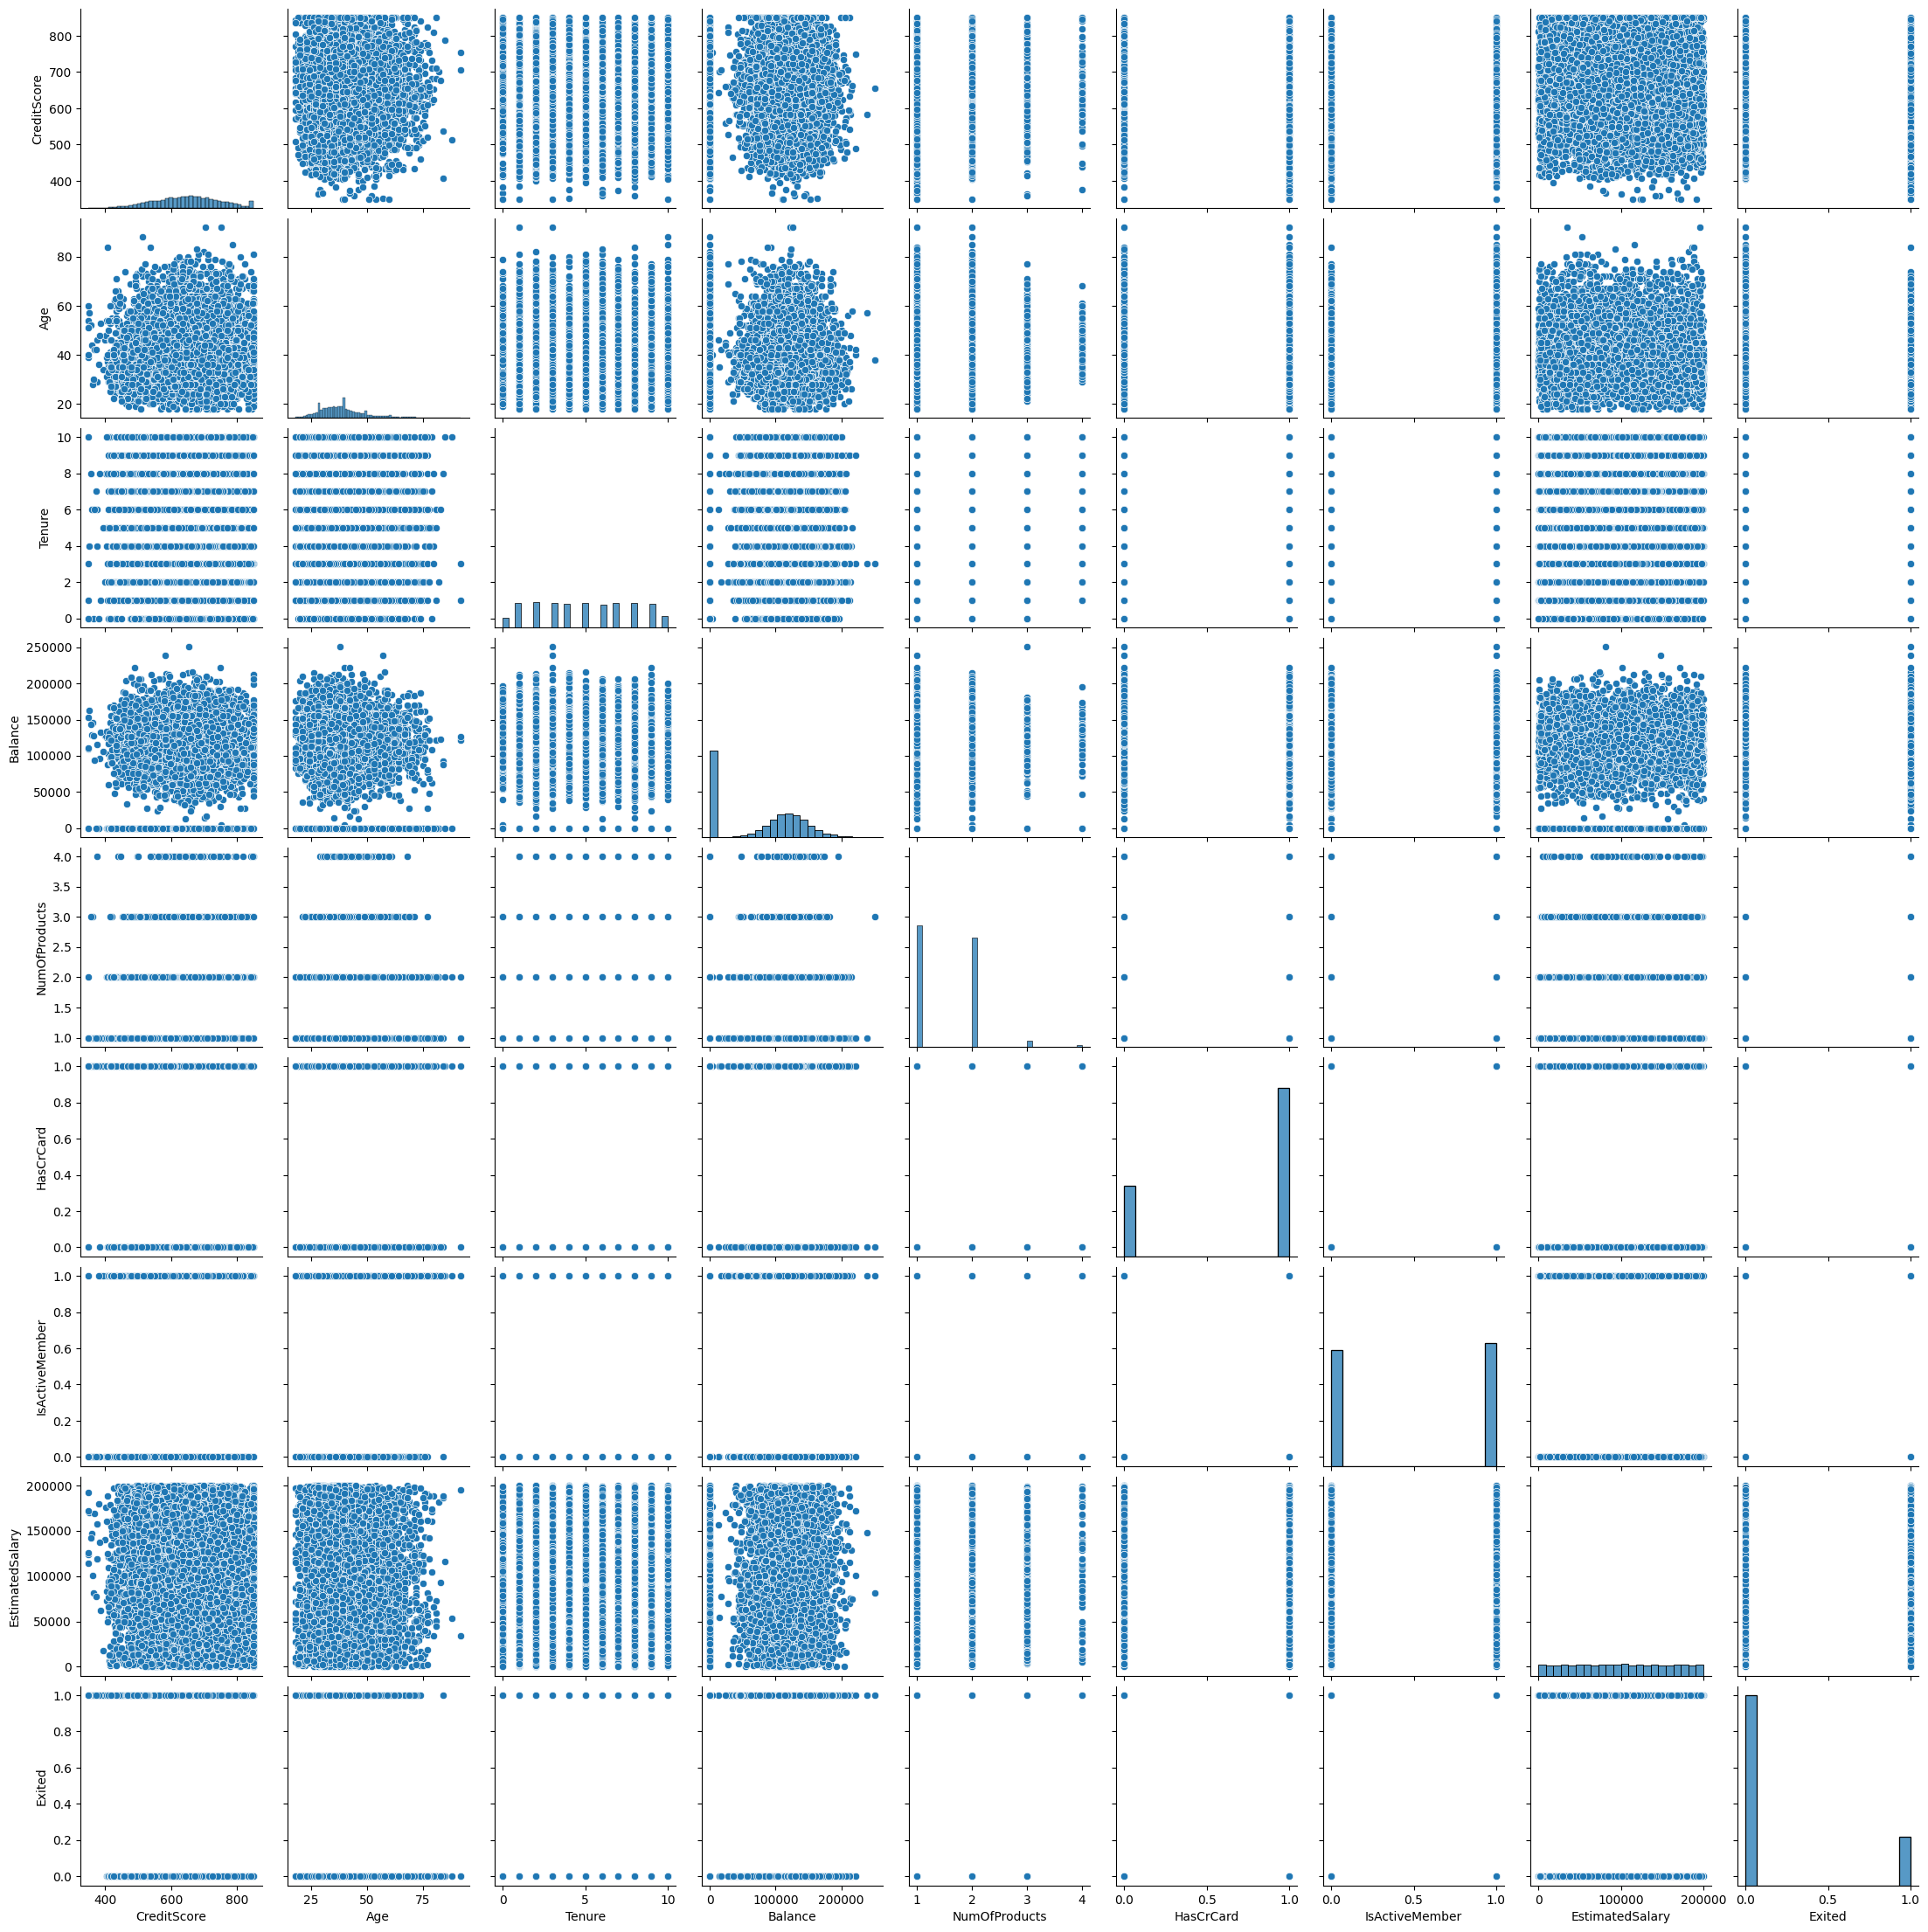

In [56]:
sns.pairplot(num_features)
plt.show()

/tmp/ipykernel_14561/856403025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x='Exited', palette='viridis')


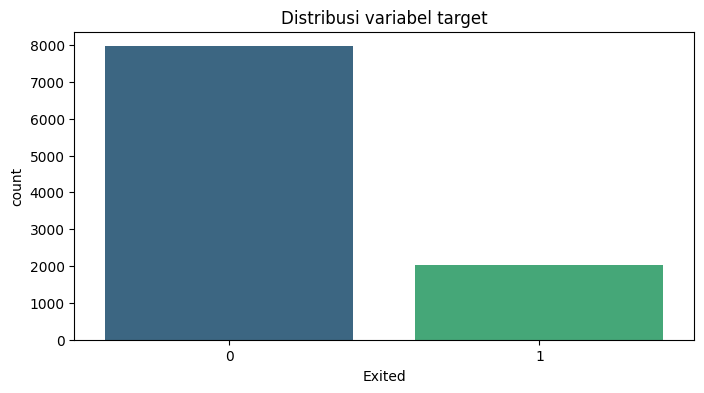

In [59]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x='Exited', palette='viridis')
plt.title('Distribusi variabel target')
plt.show()

In [69]:
label_encoder = LabelEncoder()

#list kolom kategorikal yang perlu di encode
categorical_columns = cat_features

for column in categorical_columns :
    data[column] = label_encoder.fit_transform(data[column])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [63]:
cat_features

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


# **DATA SPLITTING** 

In [ ]:
scaler = MinMaxScaler()

x = data.drop(columns=['Exited'])
y = data['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.fit_transform(x_test[numeric_columns])



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,0.672,0.0,1.0,0.189189,0.6,0.000000,0.333333,1.0,1.0,0.895550
1561,0.564,0.5,1.0,0.324324,0.4,0.476786,0.333333,1.0,1.0,0.980029
1670,0.418,1.0,1.0,0.081081,0.3,0.457317,0.000000,1.0,0.0,0.429261
6087,0.422,0.0,0.0,0.121622,0.9,0.540606,0.000000,1.0,0.0,0.765408
6669,0.334,0.0,1.0,0.513514,0.9,0.566554,0.000000,0.0,0.0,0.197107
...,...,...,...,...,...,...,...,...,...,...
5734,0.836,0.0,1.0,0.486486,0.8,0.277853,0.000000,1.0,1.0,0.346662
5191,0.664,0.0,0.0,0.540541,0.1,0.000000,0.000000,1.0,1.0,0.003084
5390,0.770,0.0,0.0,0.270270,0.1,0.000000,0.666667,0.0,0.0,0.460925
860,0.634,0.0,1.0,0.337838,0.8,0.758186,0.000000,1.0,0.0,0.487381


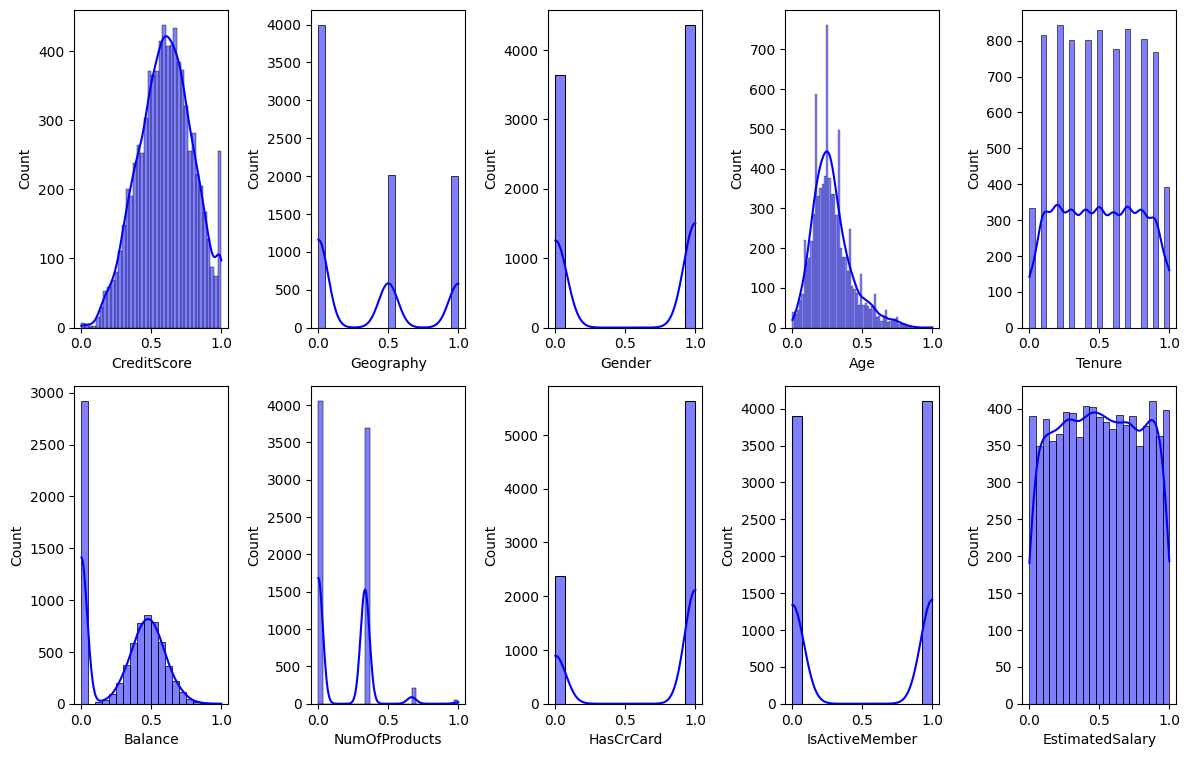

In [114]:
plt.figure(figsize=(12, 11))
for i, col in enumerate(x_train[numeric_columns]):
   
    plt.subplot(3, 5, i + 1)
    sns.histplot(x_train[col], kde=True, color='blue')
plt.tight_layout()
plt.show()

# **PELATIHAN MODEL**

In [120]:
knn = KNeighborsClassifier().fit(x_train, y_train)
dt = DecisionTreeClassifier().fit(x_train, y_train)
rf = RandomForestClassifier().fit(x_train, y_train)
svm = SVC().fit(x_train, y_train)
nb = GaussianNB().fit(x_train, y_train)

print("Model Training Selesai")

Model Training Selesai


# **EVALUASI MODEL**


In [140]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    result = {
        "Confusion_Matrix" : cm,
        'True Positive' : tp,
        'False Positive' : fp, 
        'False Negative' : fn, 
        'True Negatif' : tn,
        'Accuracy' : accuracy_score(y_test, y_pred),
        'Precision' : precision_score(y_test, y_pred),
        'Recall' : recall_score(y_test, y_pred),
        'F1-Score' : f1_score(y_test, y_pred)
    }
    return result

#mengevaluasi setiap model dan mengumpulkan hasilnya
result = {
    'K-Nearest Neighbors (KNN)' : evaluate_model(knn, x_test, y_test),
    'Decision Tree' : evaluate_model(dt, x_test, y_test),
    'Random Forest' : evaluate_model(rf, x_test, y_test),
    'Support Vector Machine' : evaluate_model(svm, x_test, y_test),
    'Naive Bayes' : evaluate_model(nb, x_test, y_test)
}

#Buat dataframe untuk meringkas hasil 
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in result.items():
    rows.append({
        'Model' : model_name, 
        'Accuracy' : metrics['Accuracy'],
        'Precision' : metrics['Precision'],
        'Recall' : metrics['Recall'],
        'F1-Score' : metrics['F1-Score']
    })
summary_df = pd.DataFrame(rows)
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)    0.8220   0.586047  0.320611  0.414474
1              Decision Tree    0.7795   0.446188  0.506361  0.474374
2              Random Forest    0.8610   0.748918  0.440204  0.554487
3     Support Vector Machine    0.8515   0.824324  0.310433  0.451017
4                Naive Bayes    0.8305   0.684932  0.254453  0.371058


NameError: name 'model' is not defined